<a href="https://colab.research.google.com/github/quinzit/Team-AI-method/blob/main/Random_Forest_without_PCA_Ziwei_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Random Forest-code by Ziwei
**Random Forest Regressor**:<br>
   Because the target variable we need to predict is worldwide box office is the continuous variable, We initialize a `RandomForestRegressor` model<br>
   The model is then trained on the scaled training data (`X_train` and `y_train`). Random Forest is an ensemble method that fits multiple decision trees on various data subsets and averages their predictions. Random Forest is highly interpretable.
### Import necessary libraries
pandas (pd):<br>
A powerful data manipulation library, Used for working with structured data in DataFrame format

numpy (np):<br>
Fundamental package for scientific computing in Python, Offers comprehensive mathematical functions

MinMaxScaler from sklearn.preprocessing:<br>
Transforms features by scaling each feature to a given range (typically [0,1]), Helps prevent features with larger ranges from dominating the model

RandomForestRegressor from sklearn.ensemble:<br>
An ensemble learning method for regression<br>
Combines multiple decision trees to make predictions<br>
Reduces overfitting common in individual decision trees

mean_squared_error, r2_score from sklearn.metrics:<br>
mean_squared_error: Measures prediction error by calculating average squared difference between predicted and actual values<br>
r2_score: Indicates how well the model fits the data, representing the proportion of variance explained by the model<br>

GridSearchCV from sklearn.model_selection:
Performs exhaustive search over specified parameter values, Used for hyperparameter tuning<br>
Implements cross-validation to evaluate model performance

PCA from sklearn.decomposition:
Principal Component Analysis for dimensionality reduction
Transforms high-dimensional data into lower dimensions while preserving variance
Useful for feature extraction and reducing multicollinearity

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Prepare dataset

In [ ]:
train_df = pd.read_csv(r'd:\AUAS\AI\assignmentDataset\assignmentDataset\full_dataset_train_withoutPCA.csv', index_col=0)
test_df = pd.read_csv(r'd:\AUAS\AI\assignmentDataset\assignmentDataset\full_dataset_test_withoutPCA.csv', index_col=0)

In [ ]:
def prepare_data(train_set, test_set):
    # Separate features and target variables
    x_train = train_df.drop(['worldwide_box_office'], axis=1)
    y_train = train_df['worldwide_box_office']

    x_test = test_df.drop(['worldwide_box_office'], axis=1)
    y_test = test_df['worldwide_box_office']

    # MinMax scaling instead of StandardScaler
    scaler = MinMaxScaler()
    x_train_scaled = pd.DataFrame(
        scaler.fit_transform(x_train),
        columns=x_train.columns,
        index=x_train.index
    )

    x_test_scaled = pd.DataFrame(
        scaler.transform(x_test),
        columns=x_test.columns,
        index=x_test.index
    )

    return x_train_scaled, y_train, x_test_scaled, y_test, scaler

X_train_scaled, y_train, X_test_scaled, y_test, scaler = prepare_data(train_df, test_df)


### Hyperparameter Tuning
Hyperparameter Tuning is a key step in machine learning model training that involves selecting the best combination of hyperparameters to optimize the model's performance

param_grid parameters:

'n_estimators': Number of trees in the forest, We test 3 different values from 10 to 30 trees<br>
'max_depth': Maximum depth of each tree, Controls how deep each tree can grow<br>
'min_samples_split':Minimum number of samples required to split a node<br>
'min_samples_leaf': Minimum number of samples required at each leaf node, Controls the minimum size of terminal nodes

Other important parameters:

random_state=42: Sets seed for reproducibility<br>
cv: Number of cross-validation folds, Data is split into cv parts for validation<br>
n_jobs=-1: Uses all available CPU cores<br>
verbose=1: Prints progress messages during training

Hyperparameter Tuning should theoretically be tested in the Validation Dataset (split another 20% of the Dataset from the Training Data). However, this project uses gridsearchcv  for Hyperparameter Tuning. The model performance of different parameter combinations was evaluated by cross-validation. Therefore, the Validation Dataset is not divided here.


In [ ]:
# Define parameter grid for grid search
param_grid_RF = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Initialize model
RF = RandomForestRegressor(random_state=42)

# Try different values for cv in GridSearchCV
cv_values = [3, 5]  # Example values for cv
best_score = -float("inf")
best_cv = 0
best_params = None

for cv in cv_values:
    try:
        print(f"Performing grid search with CV={cv}")
        grid_search = GridSearchCV(estimator=RF, param_grid=param_grid_RF, cv=cv, n_jobs=-1, verbose=1)
        grid_search.fit(X_train_scaled, y_train)

        print(f"Completed grid search with CV={cv}")

        if grid_search.best_score_ > best_score:
            best_score = grid_search.best_score_
            best_cv = cv
            best_params = grid_search.best_params_
            best_estimator = grid_search.best_estimator_

    except Exception as e:
        print(f"An error occurred during grid search with CV={cv}: {e}")

print(f"Best CV={best_cv} with Best Parameters: {best_params}")
print(f"Best score for this CV: {best_score}")

if best_params:
    best_rf = RandomForestRegressor(**best_params, random_state=42)
    best_rf.fit(X_train_scaled, y_train)
    print("Model trained with the best parameters.")
else:
    print("No best model found.")

best_rf.fit(X_train_scaled, y_train)

Performing grid search with CV=3
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Completed grid search with CV=3
Performing grid search with CV=5
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Completed grid search with CV=5
Best CV=5 with Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 10}
Best score for this CV: 0.8145267829569633
Model trained with the best parameters.


RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=10, random_state=42)

Grid Search Results:<br>
**Optimal Parameters and CV Selection**:<br>
The best result was obtained with a 5-fold cross-validation (CV=5). <br>
The best hyperparameters identified were:<br>
    - `max_depth`: 10<br>
    - `min_samples_leaf`: 4<br>
    - `min_samples_split`: 10<br>
    - `n_estimators`: 10<br>
These parameters represent the best compromise between model complexity and performance, according to the grid search.

**Model Performance**:<br>
The best score obtained is about 0.8145. This represents the r-squared value, indicating that the model with these parameters explains about 81.45% of the variance in the target variable.


### Evaluating the Optimized Model on Test Data
Now that we've found the best parameters, we're going to test them on test data. This evaluates the effectiveness of the model in making predictions about unknown data.

y_pred_RF = best_rf.predict(X_test_scaled): Uses the trained model (best_rf) to make predictions<br>
MSE (Mean Squared Error):<br>
mse: Measures average squared difference between predicted and actual values<br>
y_test: actual values<br>
y_pred_RF: predicted values<br>
Lower MSE indicates better model performance

RMSE (Root Mean Squared Error):<br>
rmse: Square root of MSE<br>
More interpretable than MSE

R² Score (Coefficient of Determination):<br>
r2 : Measures proportion of variance explained by model, Ranges from 0 to 1 (1 being perfect prediction)<br>
Higher R² indicates better fit


In [ ]:
# Predict on test set
y_pred_RF = best_rf.predict(X_test_scaled)

# Calculate evaluation metrics
test_mse = mean_squared_error(y_test, y_pred_RF)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred_RF)

print("\nTest Set Performance:")
print(f"MSE: {test_mse:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"R2 Score: {test_r2:.4f}")


Test Set Performance:
MSE: 3141825831314796.5000
RMSE: 56051992.2154
R2 Score: 0.8664


**Interpretation of Model Performance Metrics on Test Data**

Based on the test set performance results, here's a interpretation:<br>

R-squared (R²) Value: With an R² of 0.8664, our model accounts for approximately 86.64% of the variance in the target variable. This suggests the model has good predictive capabilities.

Root Mean Squared Error (RMSE): The RMSE of 56051992.2154 represents the standard deviation of prediction errors. This metric helps us understand the typical magnitude of prediction errors in the same units as our target variable.

Mean Squared Error (MSE): The MSE of 3141825831314796.5 shows the average squared prediction error. While this number appears large, it should be considered in context with the scale of our target variable.

These metrics collectively indicate a robust model performance, with the high R² value particularly highlighting the model's strong predictive power. However, the relatively large RMSE suggests there's still some room for improvement in prediction accuracy, especially for extreme values in the dataset.

### Visualization of the model performance
This visualization helps assess model performance by showing how close predictions are to actual values. Points closer to the blue line indicate better predictions.

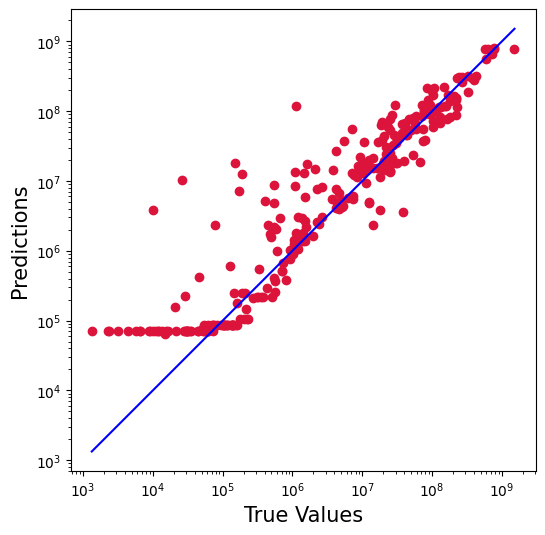

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_RF, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_RF), max(y_test))
p2 = min(min(y_pred_RF), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

**interpretation**<br>
This visualization supports the results of previous statistical indicators, showing that the model performs well overall, but there is still room for improvement in some value ranges.

In [ ]:
import lightgbm as lgb

### Extra model lightGBM
LightGBM is a gradient lifting framework developed by Microsoft that can be used for classification and regression problems. The main advantages are fast speed, low memory footprint, and high accuracy.

### Hyperparameter tuning
n_estimators: The number of weak learners (trees), [100, 200] is a common range<br>
max_depth: Maximum depth of the tree, controlling model complexity, [10, 15] moderate depth range<br>
learning_rate: Contribution weight per tree, [0.01, 0.1] Smaller values are more stable for training than the commonly used range, but require more trees<br>
num_leaves: The number of leaf nodes [31, 62] corresponds to a complete binary tree with a depth of about 5-6, which affects model complexity and fitting ability<br>
feature_fraction: indicates the feature sampling proportion. 0.8 indicates that 80% of the features are randomly selected each time to prevent overfitting<br>
bagging_fraction: Data sampling ratio. 0.8 indicates that 80% of the data is randomly selected each time to prevent overfitting<br>
bagging_freq:number of iterations are bagging? 5 indicates sampling every 5 iterations to increase randomness and prevent overfitting

In [ ]:
lgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [31, 62],
    'feature_fraction': [0.8],
    'bagging_fraction': [0.8],
    'bagging_freq': [5]
}

LGBMRegressor parameters:<br>
random_state=42: Sets random seed for reproducibility<br>
n_jobs=-1: Uses all CPU cores for parallel computing<br>
force_row_wise=True: Forces row-wise calculation, which can improve performance in some cases

GridSearchCV parameters:<br>
estimator=lgb_model: The model instance to be optimized<br>
param_grid=lgb_param_grid: Parameter search grid containing parameter combinations to try<br>
cv=5: 5-fold cross-validation<br>
scoring='neg_mean_squared_error': Uses negative mean squared error as evaluation metric<br>
n_jobs=-1: Uses all CPU cores for parallel search<br>
verbose=1: Shows training progress information

In [ ]:
# Train LightGBM
lgb_model = lgb.LGBMRegressor(
    random_state=42,
    n_jobs=-1,
    force_row_wise=True
)

lgb_grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=lgb_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

lgb_grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Total Bins 2726
[LightGBM] [Info] Number of data points in the train set: 1104, number of used features: 32
[LightGBM] [Info] Start training fr

GridSearchCV(cv=5,
             estimator=LGBMRegressor(force_row_wise=True, n_jobs=-1,
                                     random_state=42),
             n_jobs=-1,
             param_grid={'bagging_fraction': [0.8], 'bagging_freq': [5],
                         'feature_fraction': [0.8],
                         'learning_rate': [0.01, 0.1], 'max_depth': [10, 15],
                         'n_estimators': [100, 200], 'num_leaves': [31, 62]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# Get best model and make predictions
lgb_best = lgb_grid_search.best_estimator_
y_pred_lightgbm = lgb_best.predict(X_test_scaled)

# Calculate metrics
test_mse = mean_squared_error(y_test, y_pred_lightgbm)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred_lightgbm)

print("\nLightGBM Results:")
print(f"Best parameters: {lgb_grid_search.best_params_}")
print(f"Best RMSE score (CV): {np.sqrt(-lgb_grid_search.best_score_):.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R2 Score: {test_r2:.4f}")

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5

LightGBM Results:
Best parameters: {'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100, 'num_leaves': 31}
Best RMSE score (CV): 62879473.1465
Test MSE: 4285522197562303.0000
Test RMSE: 65463899.9569
Test R2 Score: 0.8178


The similar RMSE values between cross-validation (62.88M) and test set (65.46M) indicate good model consistency and generalization. The high R² score of 0.8178 shows that the model captures a significant portion of the variability in the target variable, demonstrating strong predictive performance. The combination of bagging and feature sampling at 80% appears to effectively control overfitting while maintaining good predictive power.

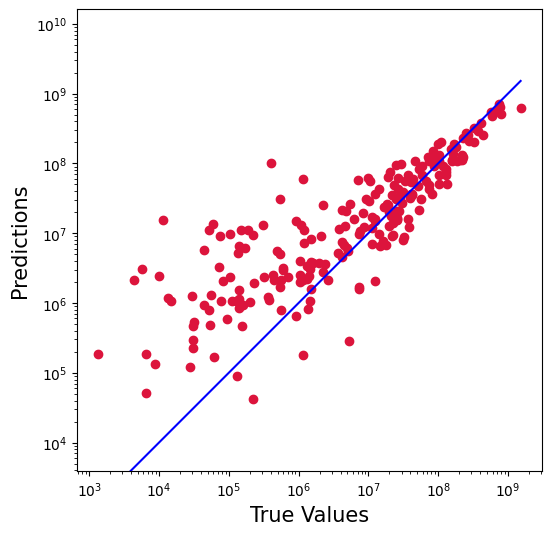

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lightgbm, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_lightgbm), max(y_test))
p2 = min(min(y_pred_lightgbm), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

**interpretation**<br>
This visualization showes that the model performs well overall, but there is still room for improvement in some value ranges.

In [ ]:
import shap
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_train_scaled)

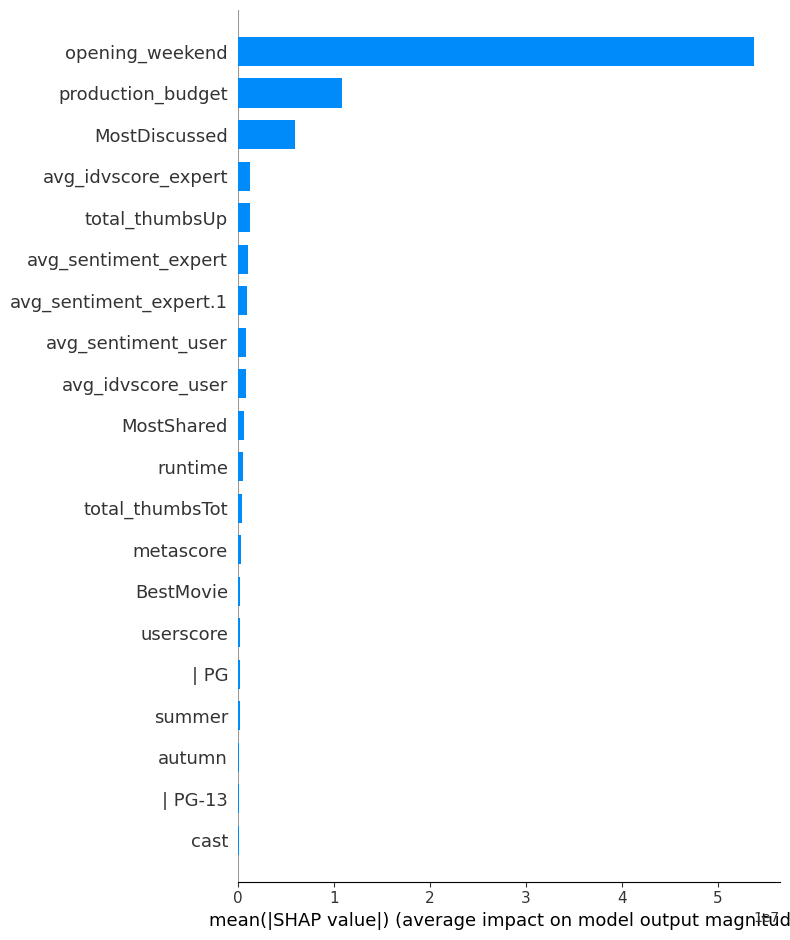

In [ ]:
shap.summary_plot(shap_values, X_train_scaled, plot_type="bar")

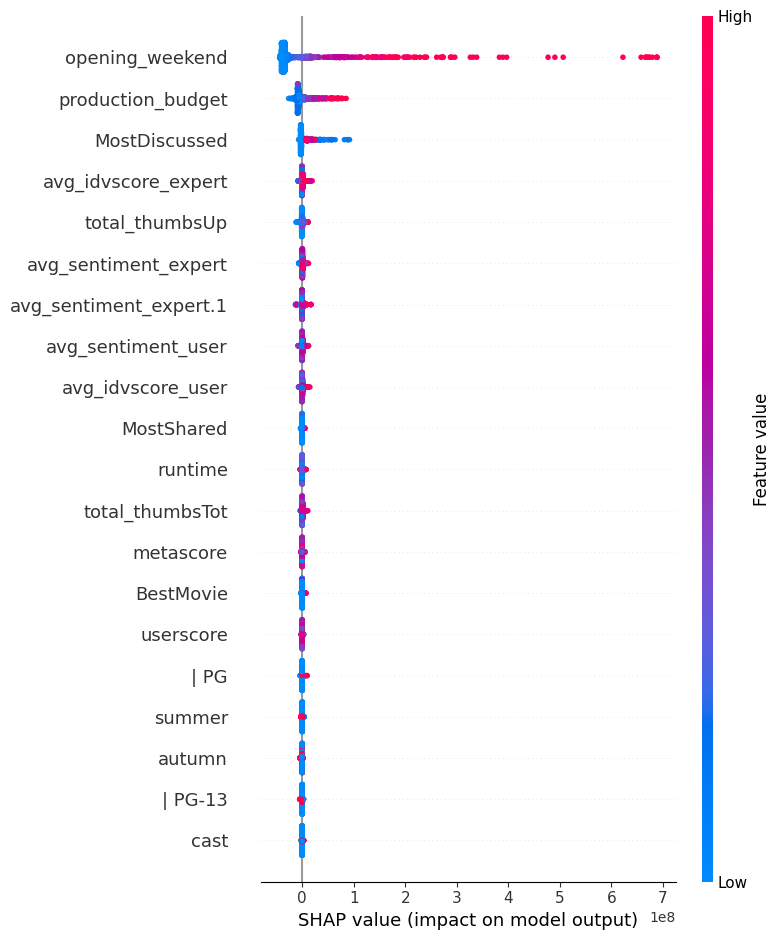

In [ ]:
shap.summary_plot(shap_values, X_train_scaled)